# Regression
This analysis is divided into several parts.
1) In the first section, we have imported the necessary libraries.
2) In the next section, we imported the dataset.

# Abalone Dataset
Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

[Get Dataset](https://archive.ics.uci.edu/dataset/1/abalone)

| Variable Name        | Role           | Type  |Description|Units	| Missing Values|
| ------------- |:-------------:| :-------------:|:-------------:|:-------------:|-----:|
| Sex     | Feature | Categorical |M, F, and I (infant) | |no|
| Length  | Feature | Continuous |Longest shell measurement |mm |no|
| Diameter |	Feature	| Continuous |	perpendicular to length |	mm |	no|
| Height |	Feature |	Continuous |	with meat in shell |	mm |	no|
|Whole_weight	| Feature |	Continuous |	whole abalone |	grams	| no |
| Shucked_weight	| Feature |	Continuous |	weight of meat |	grams |	no |
| Viscera_weight	| Feature |	Continuous	| gut weight (after bleeding) |	grams |	no |
| Shell_weight |	Feature	| Continuous |	after being dried |	grams |	no |
| Rings |	Target |	Integer |	+1.5 gives the age in years| |		no|


## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder


In [2]:
sns.set_theme(style="white")

## Load Dataset 

In [3]:
df = pd.read_csv("./data/abalone/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Data Exploration Analysis

In [4]:
np.unique(df['Sex'])

array(['F', 'I', 'M'], dtype=object)

In [11]:
df_encoded = pd.get_dummies(df, columns=['Sex'])
df_encoded.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False


In [6]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
ndf = df.drop('Sex', axis=1)
corr = ndf.corr()

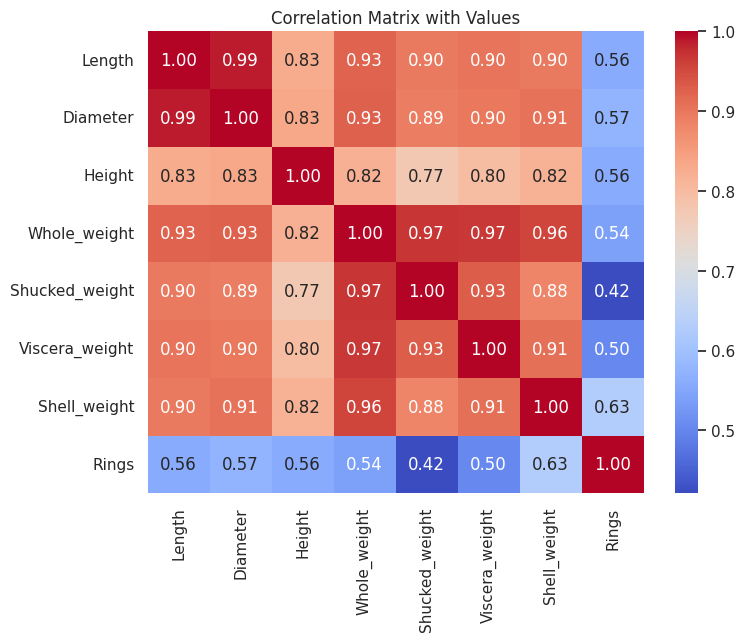

In [8]:
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f");
plt.title('Correlation Matrix with Values')
plt.show()

**interpretation of correlation**<br/>
A positive sign indicates that as one variable increases, the other tends to increase, while a negative sign suggests that as one variable increases, the other tends to decrease.<br/>
* `Rings` , target variable, in this situation has little correlation with Features.

<Figure size 800x600 with 0 Axes>

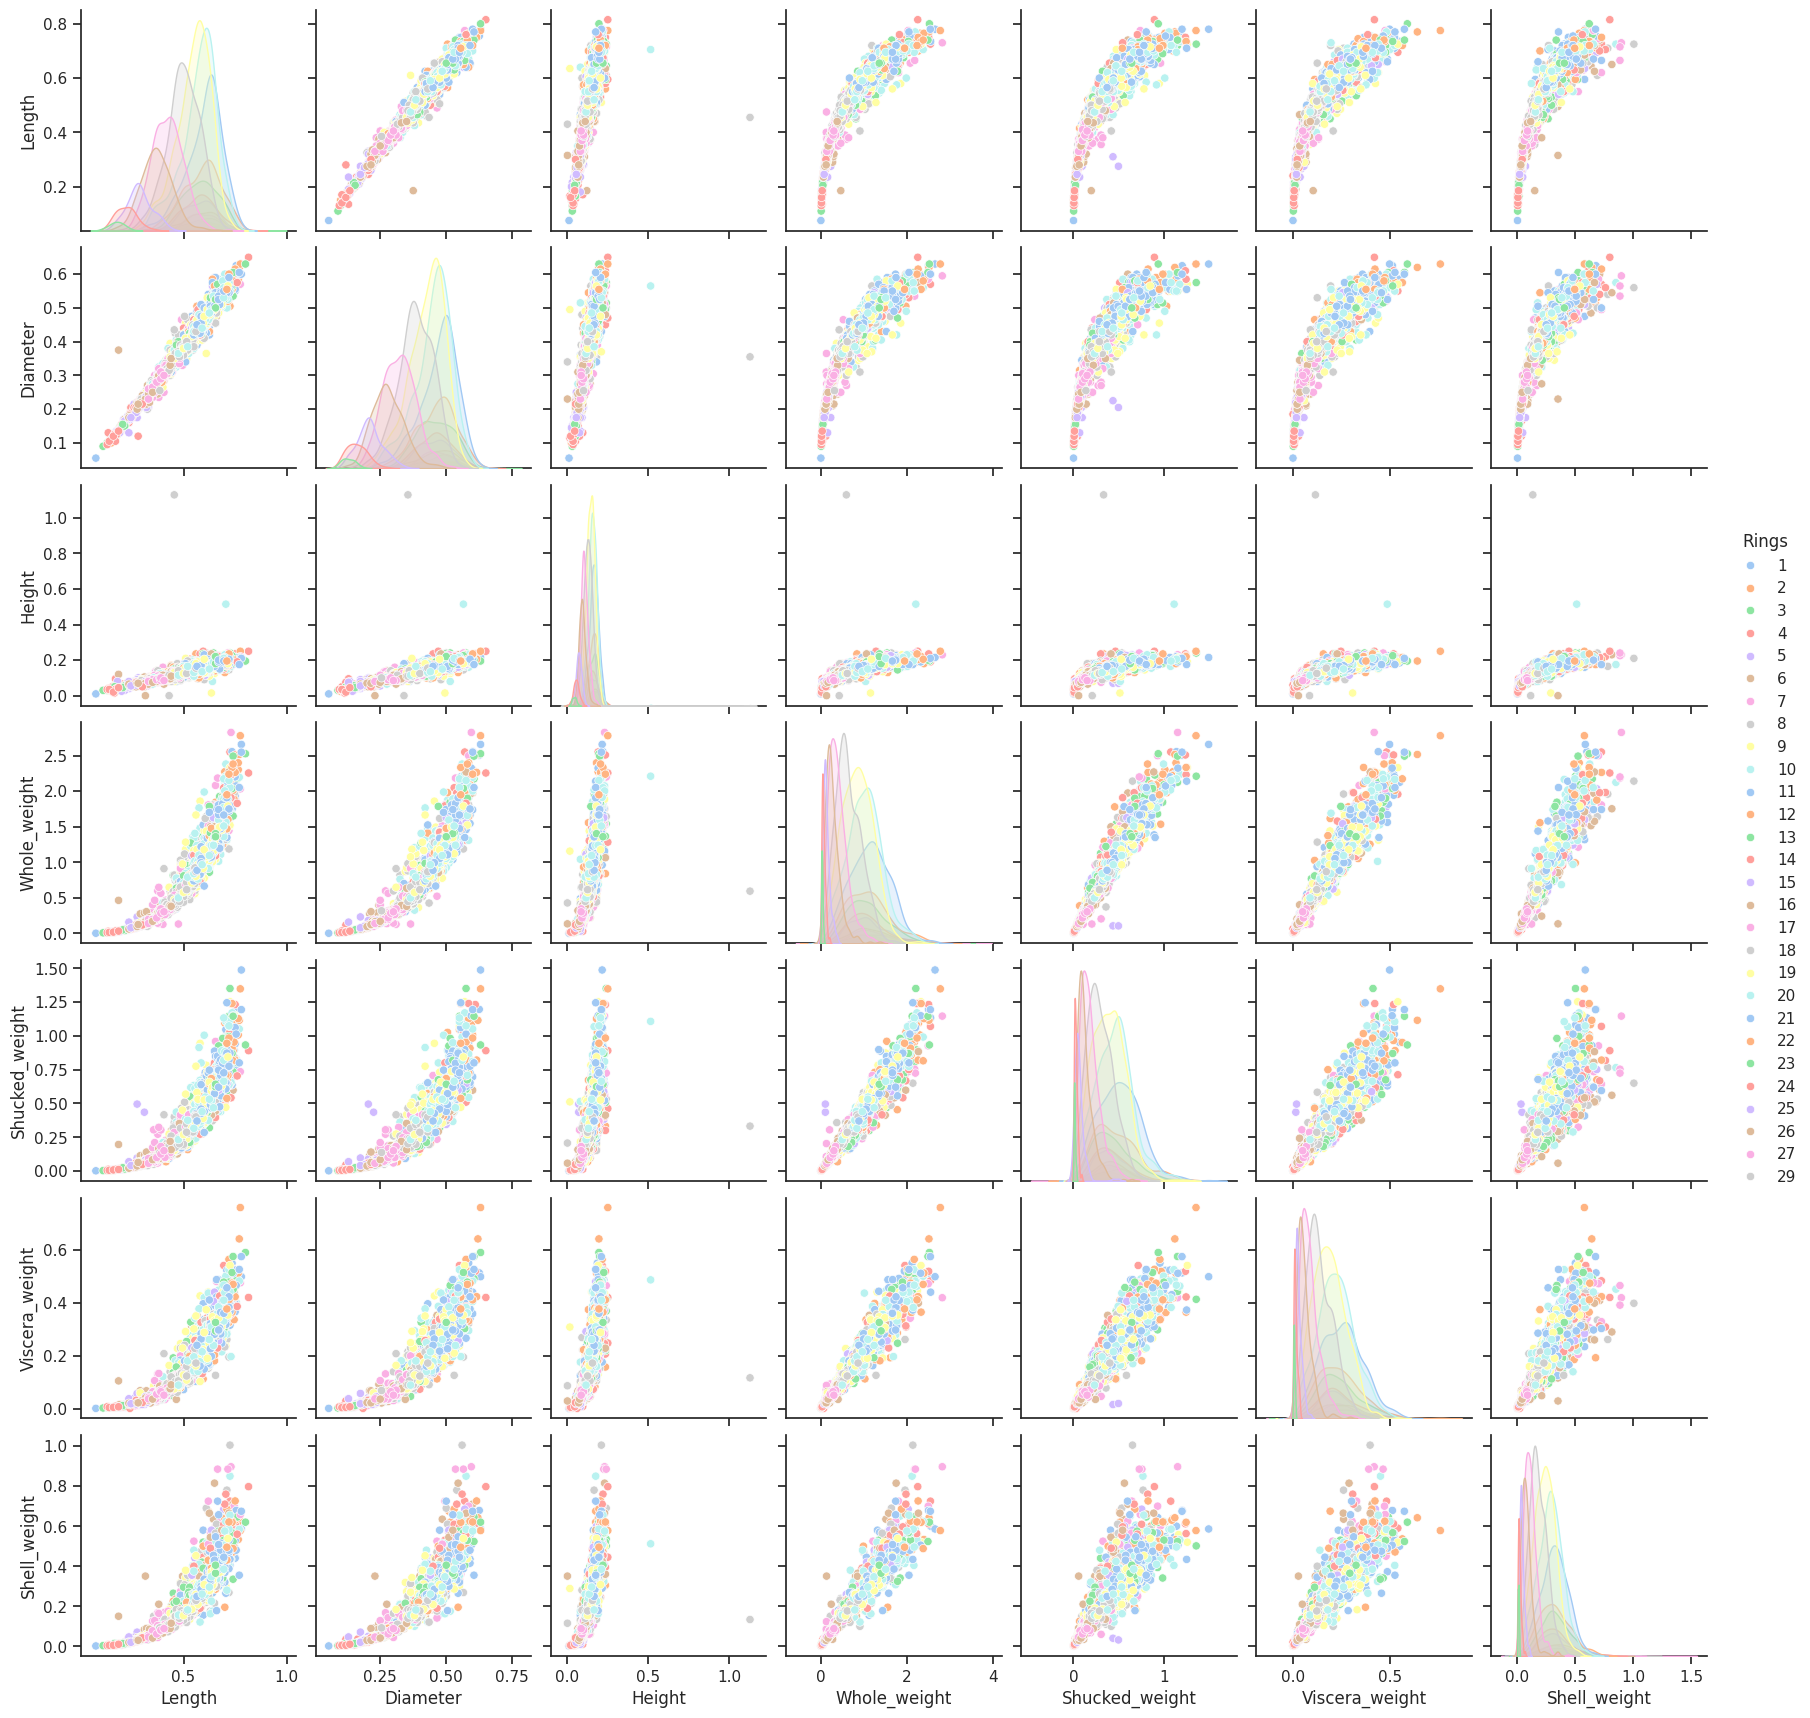

In [9]:
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.set_theme(style="ticks")
sns.pairplot(ndf,  hue="Rings", palette="pastel")
plt.show()

**interpretation of pair plot**<br/>
* **Histograms** *Diagonal plots showing the distribution of a single variable.*
* **Scatter plots** *Off-diagonal plots showing the relationship between two variables. These can reveal patterns, trends, and correlations.*

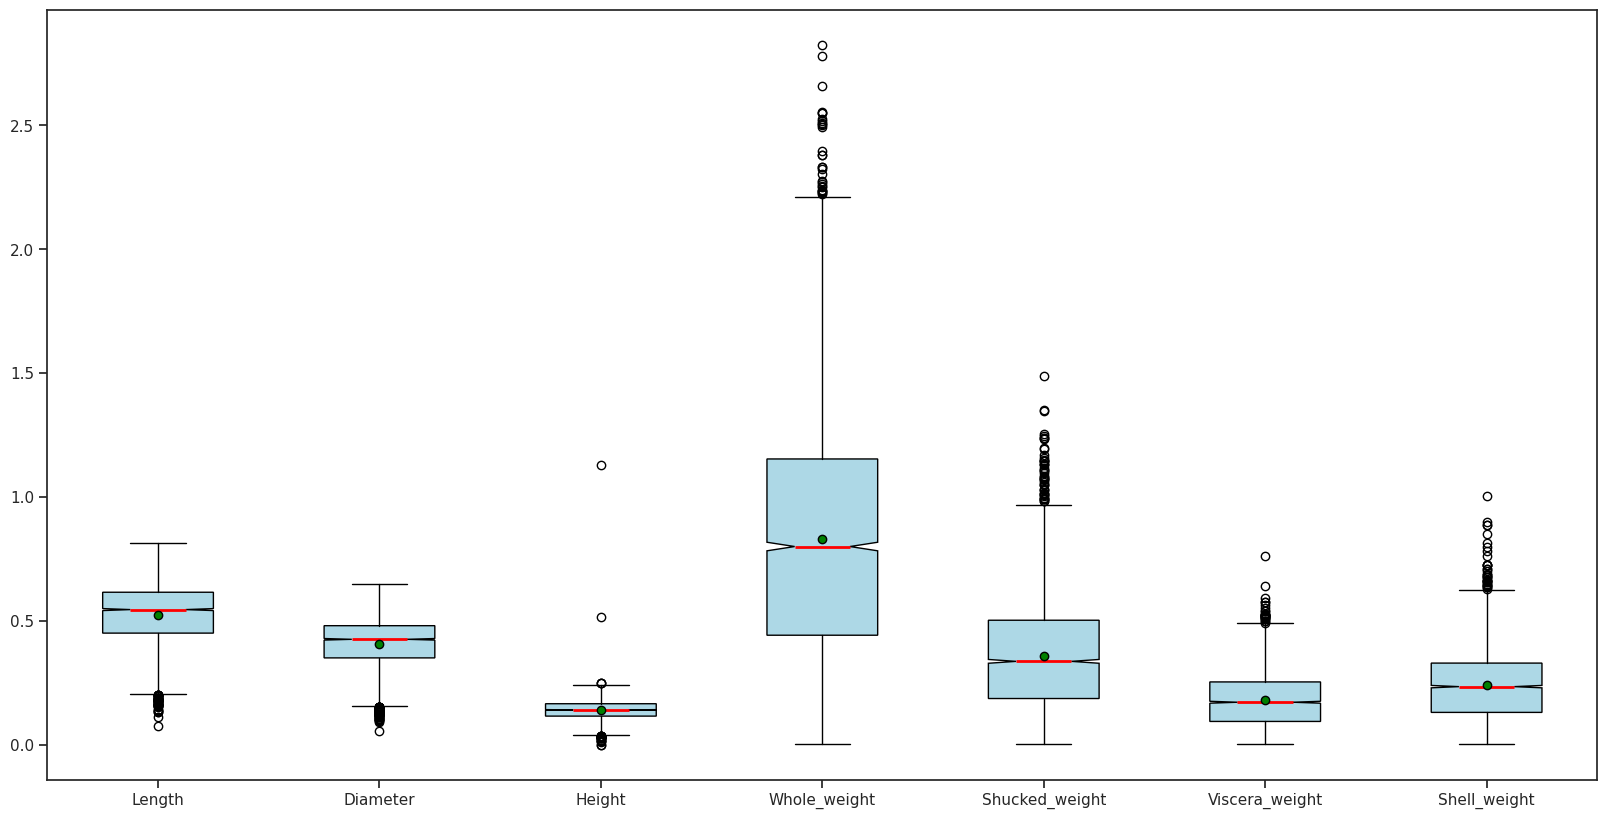

In [10]:
nndf = ndf.drop('Rings', axis=1)
cols = nndf.columns.tolist()

fig, ax = plt.subplots(figsize=(20, 10))

ax.boxplot(nndf, 
            patch_artist=True, showmeans=True, notch=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red', linewidth=2),
            meanprops=dict(marker='o', markeredgecolor='black', markerfacecolor='green'),
           # label=cols
           )

ax.set_xticklabels(cols)

plt.show()

## Data Preprocessing

In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [5]:
df.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole_weight      False
Shucked_weight    False
Viscera_weight    False
Shell_weight      False
Rings             False
dtype: bool

In [6]:
sex = df[["Sex"]].iloc[:].values
sex

array([['M'],
       ['M'],
       ['F'],
       ...,
       ['M'],
       ['F'],
       ['M']], shape=(4177, 1), dtype=object)

In [7]:
sex[0]

array(['M'], dtype=object)

In [8]:
np.where(sex==['M'])

(array([   0,    1,    3, ..., 4173, 4174, 4176], shape=(1528,)),
 array([0, 0, 0, ..., 0, 0, 0], shape=(1528,)))

In [9]:

col_name = ["Sex",	
	"Length",		
	"Diameter",	
	"Height",		
	"Whole_weight",	
	"Shucked_weight",	
	"Viscera_weight",	
	"Shell_weight",	
	"Rings"]		

In [10]:
X = df.drop(["Sex","Rings"], axis=1).values
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]],
      shape=(4177, 7))

In [11]:
X.shape

(4177, 7)

In [12]:
y = df["Rings"].values

In [13]:
y = y.reshape(1,-1).transpose()
y

array([[15],
       [ 7],
       [ 9],
       ...,
       [ 9],
       [10],
       [12]], shape=(4177, 1))

In [14]:
y.shape

(4177, 1)

### Spliting Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train

array([[0.55  , 0.445 , 0.125 , ..., 0.288 , 0.1365, 0.21  ],
       [0.475 , 0.355 , 0.1   , ..., 0.2535, 0.091 , 0.14  ],
       [0.305 , 0.225 , 0.07  , ..., 0.0585, 0.0335, 0.045 ],
       ...,
       [0.51  , 0.395 , 0.125 , ..., 0.244 , 0.1335, 0.188 ],
       [0.575 , 0.465 , 0.12  , ..., 0.516 , 0.2185, 0.235 ],
       [0.595 , 0.475 , 0.16  , ..., 0.547 , 0.231 , 0.271 ]],
      shape=(3341, 7))

## Models

### Linear Regression

$$ MSE(\beta)  = ||Y - X\beta||^2_2$$
$$ \nabla MSE(\beta) = 0 $$ 
$$ \beta = (X^TX)^{-1}X^Ty $$

In [17]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mean_squared_error(y_test, y_pred)

5.055541144299382

### Ridge Regression


**Pros**:

- Reduces Overfitting:</br>
*By adding a penalty for large coefficients, ridge regression shrinks the coefficients, thus reducing the model's variance and preventing it from fitting the training data too closely, which improves its generalization ability on unseen data.* 

- Handles Multicollinearity:</br>
*When independent variables are highly correlated, ridge regression helps stabilize the model by distributing the impact of these correlated features across their coefficients, making the model more robust.*

- Good for Prediction:</br>
*Ridge regression is particularly useful when the goal is to build a predictive model where all features are expected to contribute to the outcome, even if some have less influence.*

- Keeps All Features:</br>
*Unlike `Lasso regression`, ridge regression keeps all features in the model, even if their coefficients are shrunk, which can be beneficial when all features are relevant.*

**Cons:**

- No Feature Selection:</br>
*Ridge regression does not perform feature selection, meaning it doesn't set any coefficients to zero. This means that all features remain in the model, which can be a drawback when dealing with a large number of features.*

- Reduced Interpretability:</br>
*Shrinking the coefficients can make it harder to interpret the individual importance of each feature, as their effects are distributed across multiple features.*

- Requires Tuning Hyperparameter:</br>
*Ridge regression involves a hyperparameter (lambda or alpha) that controls the amount of regularization. Finding the optimal value for this parameter often requires cross-validation, adding to the complexity of the process.*

- Not Ideal for Sparsity:</br>
*If the goal is to create a sparse model with only a few important features, Lasso regression (which uses L1 regularization) is a better choice than ridge regression.*


**Formula:**


$$ Cost(\beta)  = ||Y - X\beta||^2_2 + \lambda ||\beta||^2_2$$
$$ \nabla Cost(\beta) = 0 $$ 
$$ \beta = (X^TX + I\lambda)^{-1}X^Ty $$

In [18]:
rg_model = linear_model.Ridge(alpha=0.1)
rg_model.fit(X_train,y_train)

y_pred = rg_model.predict(X_test)

mean_squared_error(y_test, y_pred)

5.057961921231911

### Lasso Regression

**Pros:**

- Feature Selection:</br>
*Lasso regression can automatically select relevant features by shrinking the coefficients of less important ones to zero, simplifying the model and improving interpretability.*

- Handles High-Dimensional Data:</br>
*It can effectively manage datasets with many features, a common scenario in fields like genomics and image processing.*

- Reduced Overfitting:</br>
*By shrinking coefficients, Lasso regression helps prevent overfitting, leading to better generalization to unseen data.*

- Computational Efficiency:</br>
*Lasso is generally computationally efficient, making it suitable for large datasets.*

**Cons:**

- Selection Bias with Correlated Features:</br>
*When features are highly correlated, Lasso tends to arbitrarily select one and discard the others, potentially leading to biased results.*

- Sensitivity to Scaling:</br>
*Features with different scales can impact the regularization process and affect the model's accuracy.*

- Outlier Sensitivity:</br>
*Lasso can be sensitive to outliers, which can disproportionately influence the model's coefficients and lead to overfitting.*

- Potential Instability:</br>
*The feature selection process can be unstable, meaning that small changes in the data can lead to different features being selected.*

- Interpretability Challenges:</br>
*While Lasso can simplify the model, the selection of features might not always be easily interpretable.*

- Model Selection Complexity:</br>
*Determining the optimal regularization parameter (alpha) can be challenging and may require `cross-validation`.*

- May not be Optimal for Prediction:</br>
*While Lasso is good for feature selection, some sources suggest it may not always provide the best prediction performance compared to other methods like Ridge regression, especially when dealing with correlated features.*

**Formula:**
$$ Cost(\beta)  = ||Y - X\beta||^2_2 + \lambda||\beta||_1$$ 
$$ \nabla Cost(\beta) = 0 $$

In [24]:
la_model = linear_model.Lasso(alpha=.01)

la_model.fit(X_train,y_train)

y_pred = la_model.predict(X_test)

mean_squared_error(y_test, y_pred)

5.317912405795542

### Elastic Net Regression
**Pros:**

- Handles multicollinearity:</br>
*Elastic net is effective in situations where features are highly correlated, a common challenge in many datasets.*

- Feature selection:</br>
*It can automatically select relevant features by shrinking the coefficients of less important ones towards zero, similar to Lasso.*

- Improved prediction accuracy:</br>
*By combining L1 and L2 penalties, it can provide more stable and accurate predictions than Lasso or Ridge alone, especially in high-dimensional data.*

- Flexibility:</br>
*It allows for a balance between variable selection (L1 penalty) and handling multicollinearity (L2 penalty) by adjusting the alpha parameter.*

**Cons:**

- Complexity in tuning:</br>
*Elastic net involves two regularization parameters (alpha and lambda), making the tuning process more complex compared to simpler models like Ridge or Lasso.*

- Potential for information loss:</br>
*While it selects features, it might still remove useful features if not tuned properly, especially in high-dimensional spaces.* 

- Interpretability challenges:</br>
*While better than some methods, interpreting the model's coefficients can be more challenging than with simpler models.*

- Computational cost:</br>
*Tuning and fitting the model can be more computationally expensive than simpler methods, especially with large datasets.*

$$ Cost(\beta)  = ||Y - X\beta||^2_2 + \lambda_1||\beta||_1 + \lambda_2||\beta||^2_2$$ 
$$ \nabla Cost(\beta) = 0 $$

In [20]:
elastic_model = linear_model.ElasticNet(random_state=0)
elastic_model.fit(X_train, y_train)

y_pred = elastic_model.predict(X_test)
mean_squared_error(y_test, y_pred)

10.050325006346077

### Decision Tree Regression

In [21]:
dt_model = tree.DecisionTreeRegressor(max_depth=6)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

mean_squared_error(y_test, y_pred)

5.389993233280394

### Random Forest Regression

In [22]:
rf_model = ensemble.RandomForestRegressor(max_depth=6, random_state=64)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mean_squared_error(y_test, y_pred)

/home/reza/Pro/Projects/ML/venv/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


5.065186030207752

### GBoostRegression

In [23]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

gb_model = ensemble.GradientBoostingRegressor(**params)
gb_model.fit(X_train, y_train)

mean_squared_error(gb_model.predict(X_test), y_test)

/home/reza/Pro/Projects/ML/venv/lib/python3.13/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


5.097569454795717